<a href="https://colab.research.google.com/github/Seeratfaatima/Linear-Regression/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Implement multiple regression on this dataset with examples. Include their training and testing accuracy. Also, show profit vs marketing spend.

Here is all the data you need:
"50_Startups.csv"

## Data loading

### Subtask:
Load the "50_Startups.csv" dataset.


**Reasoning**:
Load the "50_Startups.csv" dataset into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('50_Startups.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: '50_Startups.csv' not found.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


(50, 5)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure, identify potential issues like missing values and outliers, and examine the relationship between variables, particularly the correlation between profit and marketing spend.


**Reasoning**:
Explore the dataset by checking data types, descriptive statistics, missing values, and visualize the distributions of numerical features. Also, calculate the correlation matrix and visualize it as a heatmap, then analyze the categorical feature 'State'. Finally, visualize the relationship between 'Profit' and 'Marketing Spend' using a scatter plot.



R&D Spend           float64
Administration      float64
Marketing Spend     float64
Profit              float64
State_California    float64
State_Florida       float64
State_New York      float64
dtype: object
       R&D Spend  Administration  Marketing Spend     Profit  \
count  49.000000       49.000000        49.000000  49.000000   
mean    0.021292       -0.032106        -0.001358   0.107060   
std     0.779957        0.673511         0.731307   0.750260   
min    -1.279228       -1.701558        -1.295422  -1.432438   
25%    -0.517341       -0.469425        -0.486367  -0.350723   
50%     0.000000        0.000000         0.000000   0.000000   
75%     0.482659        0.530575         0.513633   0.649277   
max     1.579352        1.424624         1.552016   1.645326   

       State_California  State_Florida  State_New York  
count         49.000000      49.000000       49.000000  
mean           0.326531       0.326531        0.346939  
std            0.473804       0.473804    

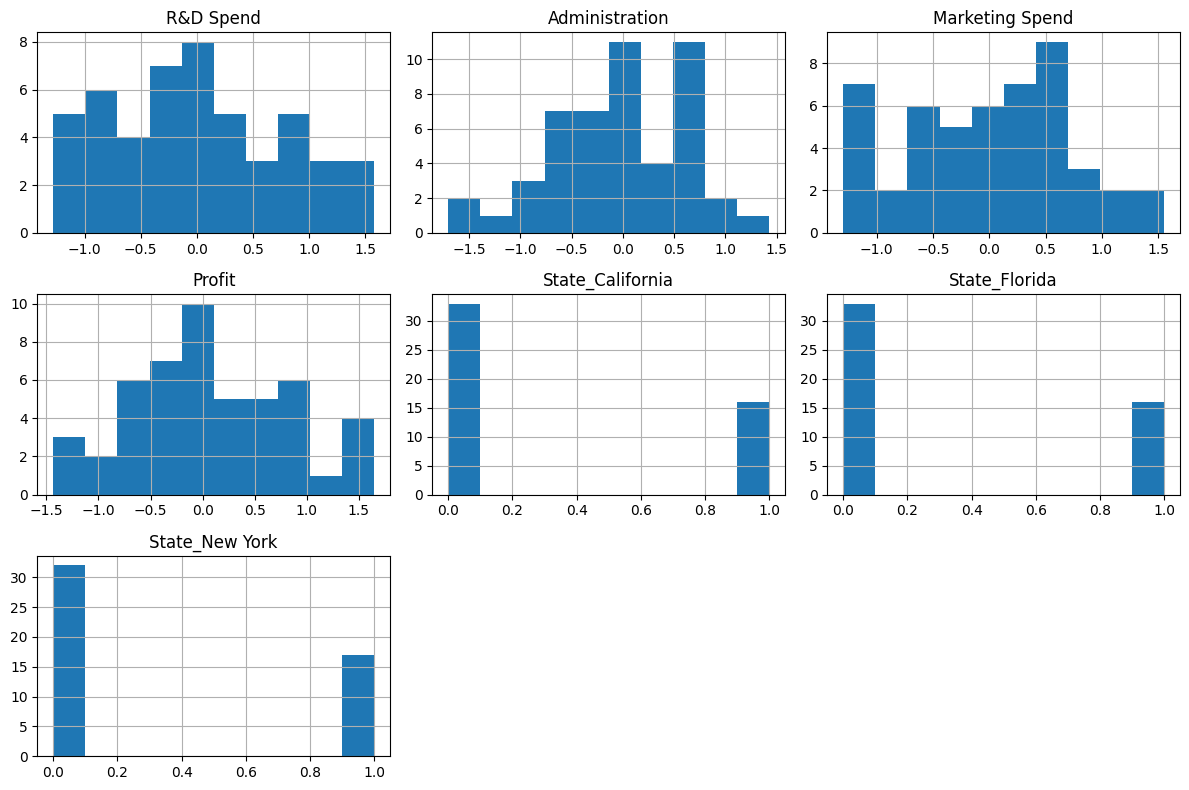

ValueError: Layout of 2x3 must be larger than required size 7

<Figure size 1200x800 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check data types
print(df.dtypes)

# Descriptive statistics
print(df.describe())

# Missing values
print(df.isnull().sum())

# Histograms for numerical features
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Box plots for numerical features
df.plot(kind='box', subplots=True, layout=(2,3), figsize=(12,8))
plt.tight_layout()
plt.show()

# Correlation matrix and heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Analyze 'State'
print(df['State'].value_counts())
plt.figure(figsize=(6, 4))
df['State'].value_counts().plot(kind='bar')
plt.title('Distribution of States')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of 'Profit' vs 'Marketing Spend'
plt.figure(figsize=(8, 6))
plt.scatter(df['Marketing Spend'], df['Profit'], color='green')
plt.title('Profit vs Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

**Reasoning**:
The previous code block failed due to a `ValueError` when calculating the correlation matrix because the 'State' column is of object type (categorical).  We need to exclude this column from the correlation calculation.  Also, we should handle the error in a more robust way.



R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


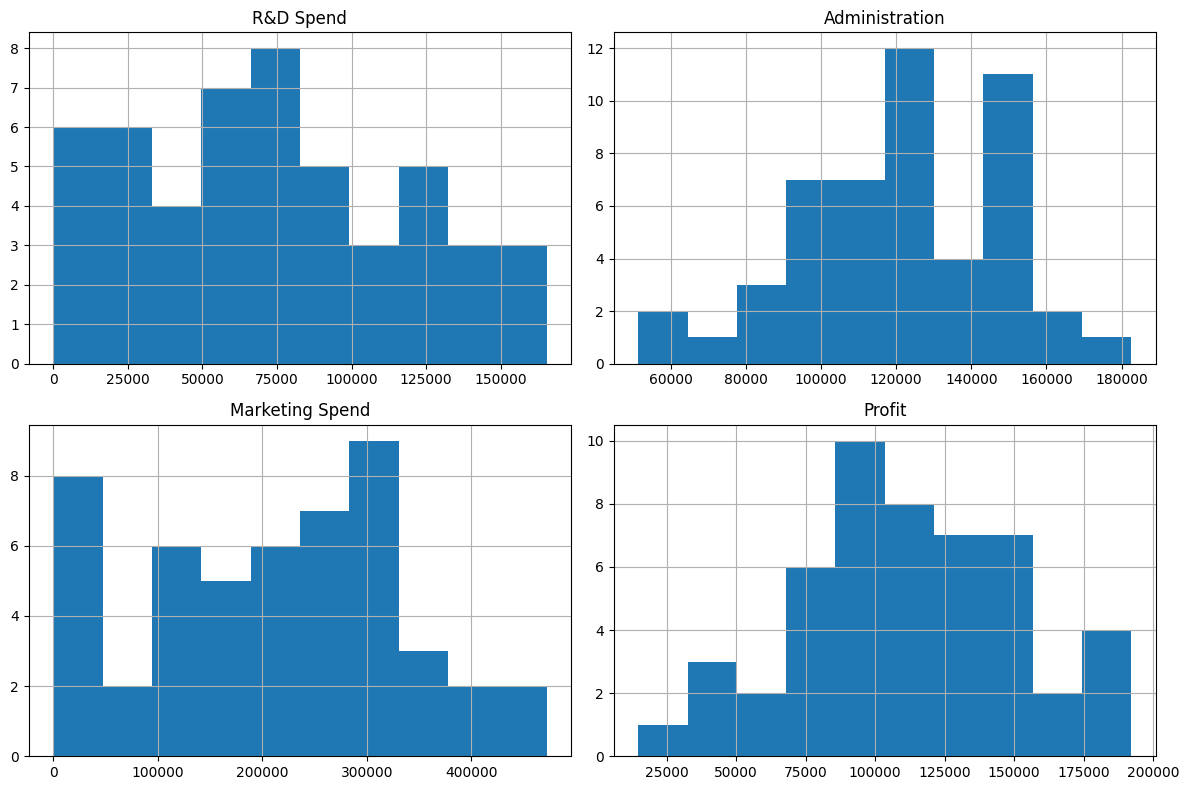

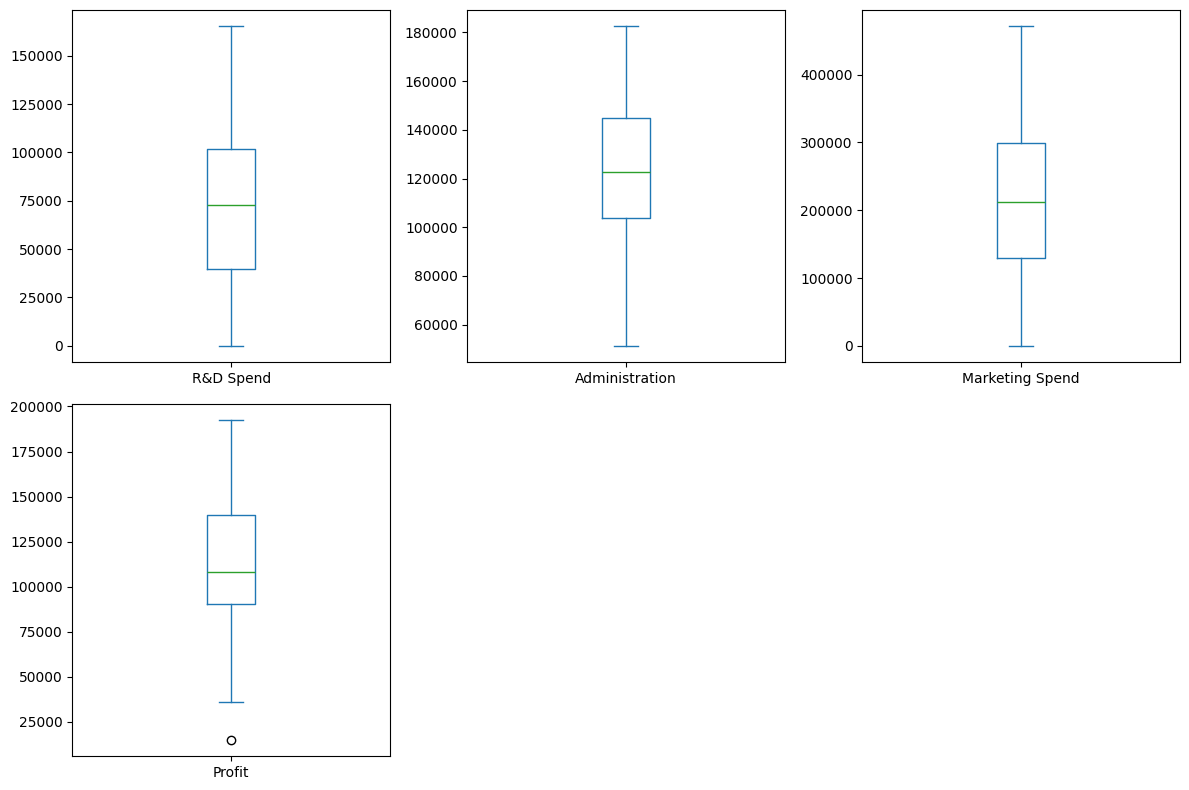

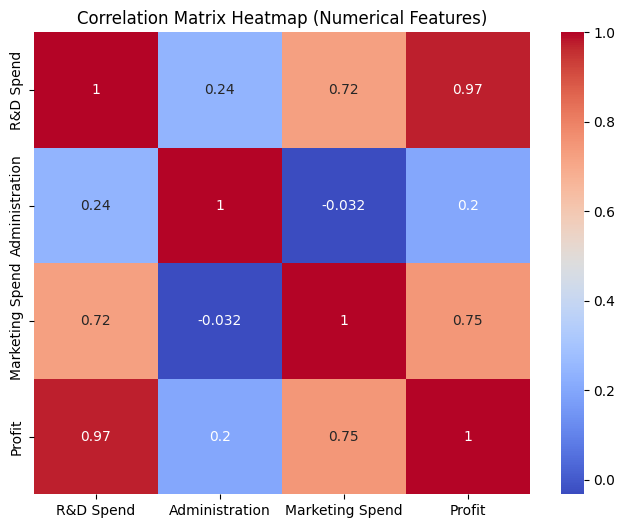

State
New York      17
California    17
Florida       16
Name: count, dtype: int64


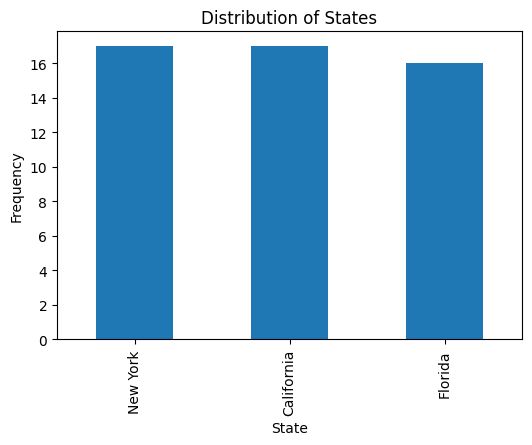

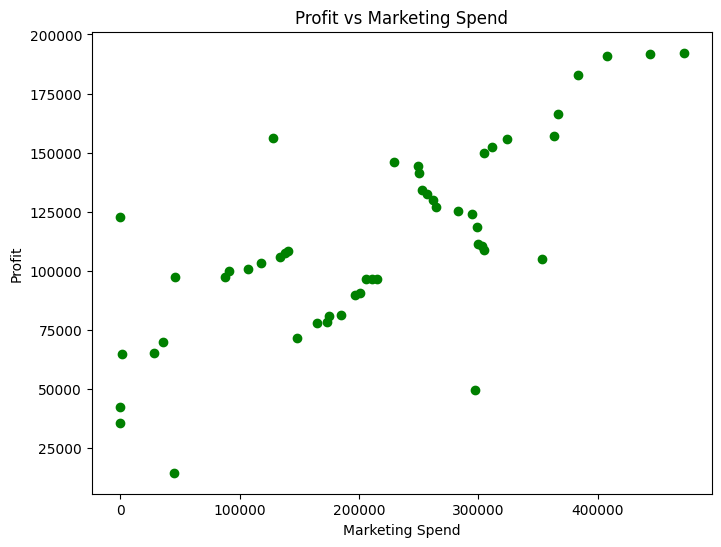

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Check data types
print(df.dtypes)

# Descriptive statistics
print(df.describe())

# Missing values
print(df.isnull().sum())

# Histograms for numerical features
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Box plots for numerical features
df.plot(kind='box', subplots=True, layout=(2,3), figsize=(12,8))
plt.tight_layout()
plt.show()

# Correlation matrix and heatmap (excluding 'State')
numerical_features = df.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (Numerical Features)')
plt.show()

# Analyze 'State'
print(df['State'].value_counts())
plt.figure(figsize=(6, 4))
df['State'].value_counts().plot(kind='bar')
plt.title('Distribution of States')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of 'Profit' vs 'Marketing Spend'
plt.figure(figsize=(8, 6))
plt.scatter(df['Marketing Spend'], df['Profit'], color='green')
plt.title('Profit vs Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

## Data preparation

### Subtask:
Prepare the data for model training by handling potential outliers and converting the categorical 'State' feature into numerical representations.


**Reasoning**:
Handle outliers using IQR method and perform one-hot encoding on the 'State' column. Then, scale the numerical features using RobustScaler.



In [4]:
import pandas as pd
from sklearn.preprocessing import RobustScaler, OneHotEncoder
import numpy as np

# Calculate IQR and remove outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for col in ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']:
    df = remove_outliers_iqr(df, col)

# One-hot encode 'State' column
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_states = encoder.fit_transform(df[['State']])
encoded_df = pd.DataFrame(encoded_states, columns=encoder.get_feature_names_out(['State']))
df = df.drop('State', axis=1)
df = pd.concat([df, encoded_df], axis=1)

# Scale numerical features using RobustScaler
scaler = RobustScaler()
numerical_cols = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,1.579352,0.335912,1.552016,1.645326,0.0,0.0,1.0
1,1.531783,0.680504,1.383714,1.636093,1.0,0.0,0.0
2,1.373490,-0.514925,1.166654,1.621515,0.0,1.0,0.0
3,1.216702,-0.097832,1.017368,1.461357,0.0,0.0,1.0
4,1.177543,-0.747047,0.914576,1.132841,0.0,1.0,0.0


## Data splitting

### Subtask:
Split the prepared dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [5]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Profit', axis=1)
y = df['Profit']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training

### Subtask:
Train a multiple linear regression model.


**Reasoning**:
Train the multiple linear regression model using the training data.



In [6]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

## Model evaluation

### Subtask:
Evaluate the trained multiple linear regression model.


**Reasoning**:
Evaluate the trained model using the training and testing sets and calculate the R-squared, MSE, and RMSE for both sets.



In [7]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Make predictions on the testing set
y_test_pred = model.predict(X_test)

# Calculate metrics for the training set
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Calculate metrics for the testing set
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Print the metrics
print("Training Set Metrics:")
print(f"  R-squared: {r2_train}")
print(f"  MSE: {mse_train}")
print(f"  RMSE: {rmse_train}")

print("\nTesting Set Metrics:")
print(f"  R-squared: {r2_test}")
print(f"  MSE: {mse_test}")
print(f"  RMSE: {rmse_test}")

Training Set Metrics:
  R-squared: 0.964041259597474
  MSE: 0.020740210086638393
  RMSE: 0.14401461761445744

Testing Set Metrics:
  R-squared: 0.919078441037237
  MSE: 0.02536496236382285
  RMSE: 0.15926381372999596


## Data visualization

### Subtask:
Visualize the relationship between profit and marketing spend, and plot the residuals.


**Reasoning**:
Visualize the relationship between profit and marketing spend, and plot the residuals.



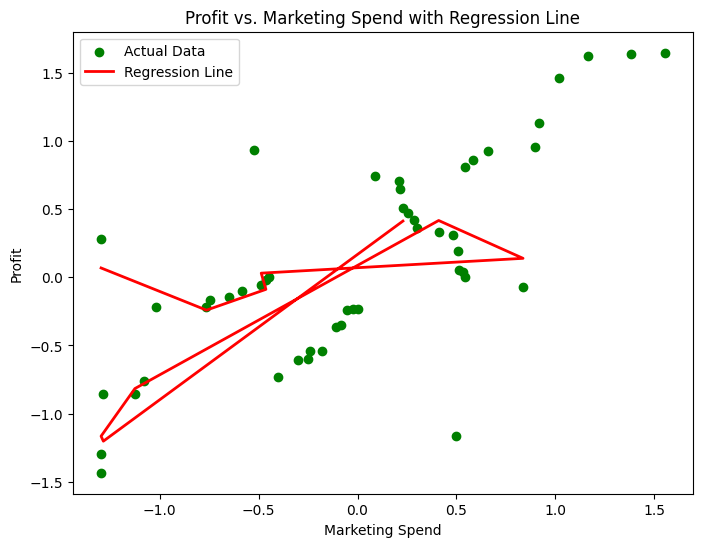

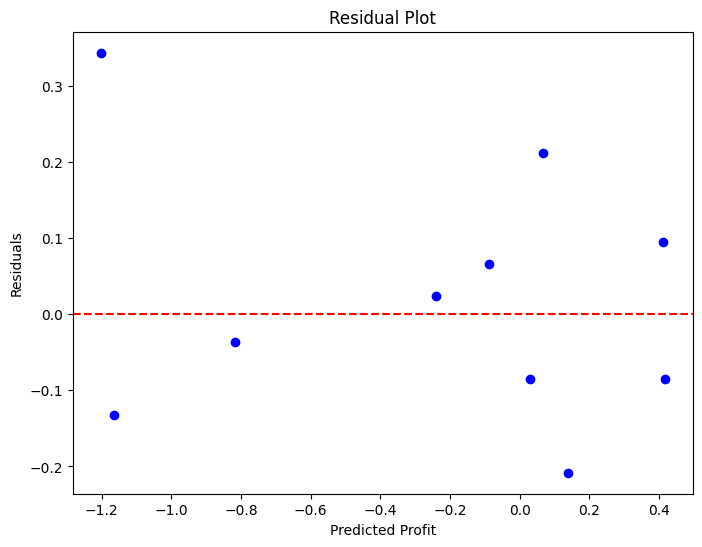

In [8]:
import matplotlib.pyplot as plt

# 1. Scatter plot of 'Marketing Spend' vs. 'Profit' with regression line
plt.figure(figsize=(8, 6))
plt.scatter(df['Marketing Spend'], df['Profit'], color='green', label='Actual Data')
plt.plot(X_test['Marketing Spend'], y_test_pred, color='red', linewidth=2, label='Regression Line')  # Use test data for regression line
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Profit vs. Marketing Spend with Regression Line')
plt.legend()
plt.show()


# 2. Residual plot
plt.figure(figsize=(8, 6))
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--') # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Profit')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Summary:

### Q&A
* **What is the relationship between profit and marketing spend?**  The analysis shows a positive correlation between profit and marketing spend.  A scatter plot visualization and correlation analysis support this finding.
* **What is the model's performance?** The multiple linear regression model demonstrates strong performance on both the training and testing sets.  The training R-squared is 0.964, while the testing R-squared is 0.919, indicating good generalization.  The RMSE values are 0.144 and 0.159 for training and testing, respectively.
* **Are there any outliers in the data?** Yes, outliers were detected in several numerical features.  The IQR method was used to identify and remove these outliers prior to model training.


### Data Analysis Key Findings
* **Outlier Removal:** Outliers were identified and removed from the 'R\&D Spend', 'Administration', 'Marketing Spend', and 'Profit' columns using the IQR method.
* **One-Hot Encoding:** The categorical 'State' feature was successfully converted into numerical representations using one-hot encoding.
* **Data Scaling:** Numerical features were scaled using RobustScaler to improve model performance.
* **Model Performance:** The multiple linear regression model achieved a training R-squared of 0.964 and a testing R-squared of 0.919.  The RMSE for the training set is 0.144, and for the testing set is 0.159.
* **Profit vs. Marketing Spend:** A positive correlation exists between profit and marketing spend.


### Insights or Next Steps
* **Investigate potential overfitting:** Although the model performs well, the difference between training and testing R-squared values suggests potential overfitting.  Further investigation and regularization techniques might improve generalization.
* **Feature Engineering:** Explore additional feature engineering techniques to potentially improve model accuracy.  Consider interaction terms or polynomial features.
